<h1 align='center'>
<span style='color:lawngreen'>
<b>
TRAVEL INSURANCE PREDICTION
</b>
</h1>
<br>

## **| Process**

1. Read and Load data
2. Data analysis
3. Feature Engineering
4. Train-Test split
5. Build and Train model
6. Perform and Measure the Performance of model
7. Which is the main metric, best scaler, dimensional reduction and Naive Bayes model?

<br>

<h2 align='center'>
<span style='background:black; color:lawngreen'>
<b>
1 | Read and Load data
</b>
</span>
</h2>
<br>

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

- **Age**: Age of the Customer.
- **Employment Type**: The Sector in which Customer is employed.
- **GraduateOrNot**: Whether the Customer is college graduate or not.
- **AnnualIncome**: The yearly Income of the Customer in Indian Rupees.
- **FamilyMembers**: Number of Members in Customer's family.
- **ChronicDisease**: Whether the Customer suffers from any major disease or conditions like Diabetes/High BP or Asthama,...
- **FrequentFlyer**: Derived data based on Customer's History of Booking Air Tickets on atleast 4 different Instances in the last 2 years (2017-2019).
- **EverTravelledAbroad**: Has the Customer ever travelled to a foreign country.
- **TravelInsurance**: Did the Customer buy Travel Insurance Package during Introductory offering held in the year 2019.

Our target is `TravelInsurance` column.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head(3)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


This dataset has 1987 rows.

<br>

<h2 align='center'>
<span style='background:black; color:lawngreen'>
<b>
2 | Data Analysis
</b>
</h2>

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,993.000000,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


<br>

<h3 align='center'>
<span style='background:palegreen; color:grey'>
<b>
2.1 | Data Cleaning
</b>
</h3>

<br>

First, we drop the 'Unnamed: 0' column.

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


<br>

Because data was processed, so we change the type of 2 columns: `ChronicDiseases` and `TravelInsurance` to **str**.

In [6]:
df = df.astype(
    {
        'ChronicDiseases': str,
        'TravelInsurance': str
    }
)

To easy analyse data, we change the name of `TravelInsurance` column to `target`.

In [7]:
df = df.rename(columns={'TravelInsurance': 'target'})
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'target'],
      dtype='object')

<br>

Show numerical and categorical data from dataset.

In [8]:
categorical_df = df.select_dtypes(exclude='number')
numerical_df = df.select_dtypes(include='number')

print(f'Categorical columns:\n{categorical_df.columns}')
print(f'\nNumerical columns:\n{numerical_df.columns}')

Categorical columns:
Index(['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'target'],
      dtype='object')

Numerical columns:
Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')


<br>

Check how many duplicated values:

In [9]:
df.duplicated().sum()

np.int64(738)

There are so many duplicated values in this dataset. So we need to drop them.

In [10]:
print(f'The shape of data before drop duplicatation: {df.shape}')

df = df.drop_duplicates()
df = df.dropna()

df.duplicated().sum()

print(f'The shape of data after preprocess data: {df.shape}')

The shape of data before drop duplicatation: (1987, 9)
The shape of data after preprocess data: (1249, 9)


<br>

<h3 align='center'>
<span style='background:palegreen; color:grey'>
<b>
2.2 | Visualization
</b>
</span>
</h3>

In [11]:
# for ploting:
import matplotlib.pyplot as plt
import seaborn as sns

# optional
import warnings
warnings.filterwarnings('ignore')

In [12]:
# set font for ploting:
font = {'fontsize': 16,
        'fontstyle': 'italic',
        'backgroundcolor': 'black',
        'color': 'white'}

%matplotlib inline

plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

<br>

Build visualization function for categorical dataframe:

In [13]:
import math

def pie_plot(categorical_df, n_cols=3):
    
    fig, axes = plt.subplots(nrows=math.ceil(categorical_df.shape[1]/n_cols),
                             ncols=n_cols,
                             figsize=(15, 10))

    for i, col in enumerate(categorical_df.columns):

        ax = axes[i // n_cols][i % n_cols]
        
        ax.pie(categorical_df[col].value_counts(),
               labels=categorical_df[col].value_counts().index,
               colors=sns.color_palette('crest'),
               autopct='%1.1f%%', 
               shadow=True, 
               startangle=90)
        
        ax.set_title(f'Distribution of {col}', fontdict=font, pad=15)
        
    plt.tight_layout()
    plt.show()

<br>

Build visualization function for numerical dataframe:

In [14]:
def hist_plot(df, n_cols=2):
    
    fig, axes = plt.subplots(nrows=math.ceil(df.shape[1]/n_cols), 
                             ncols=n_cols,
                             figsize=(10, 8))

    colors = sns.light_palette('seagreen', df.shape[1])

    for i, col in enumerate(df.columns):
        r, c = i // n_cols, i % n_cols
        sns.histplot(data=df, x=col, ax=axes[r][c], 
                     kde=True, color=colors[i])
        axes[r][c].set_title(f'Distribution of {col}', fontdict=font, pad=15)
        
    plt.tight_layout()
    plt.show()

<br>

#### **| Categorical dataframe**

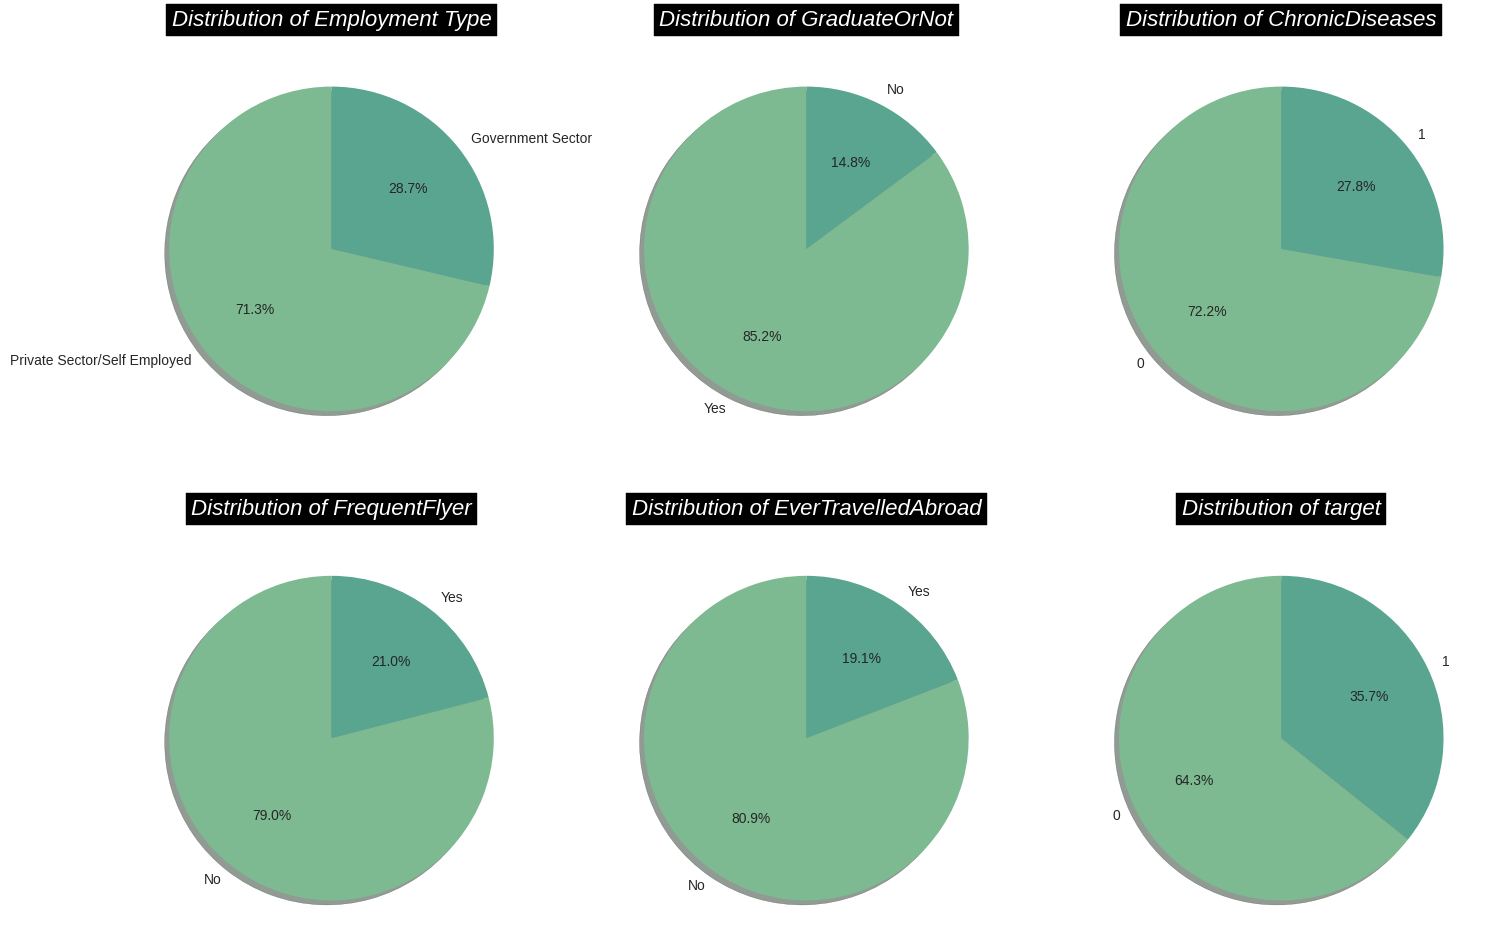

In [15]:
pie_plot(categorical_df)

<br>

#### **| Numerical dataframe**

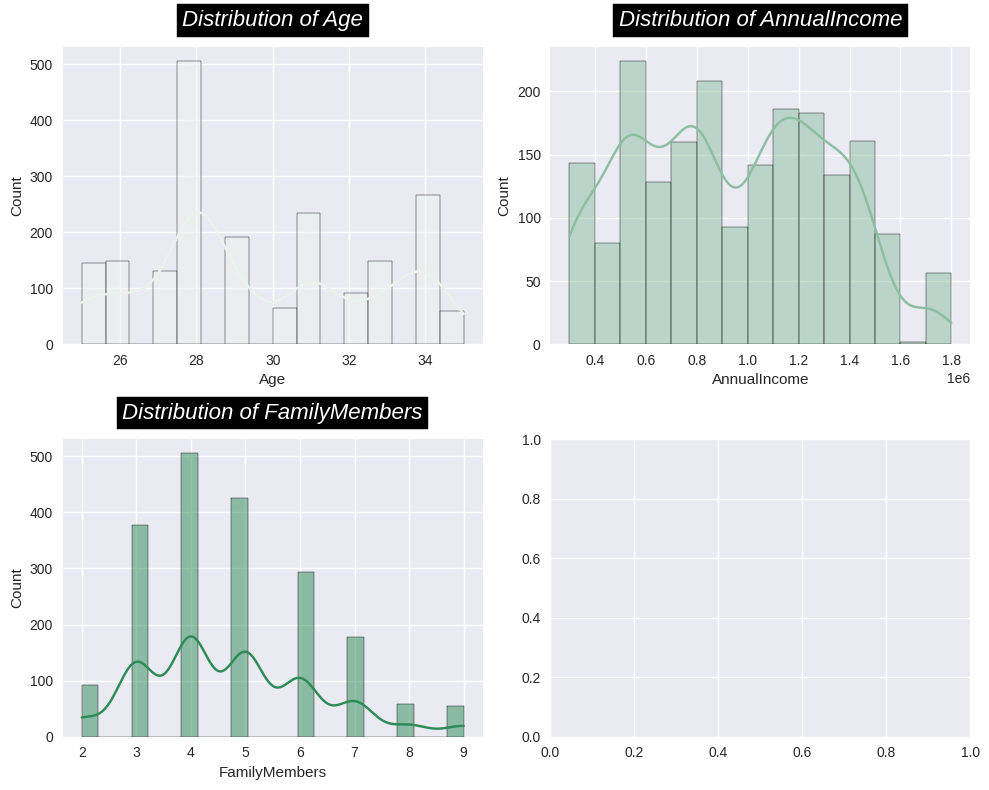

In [16]:
hist_plot(numerical_df)

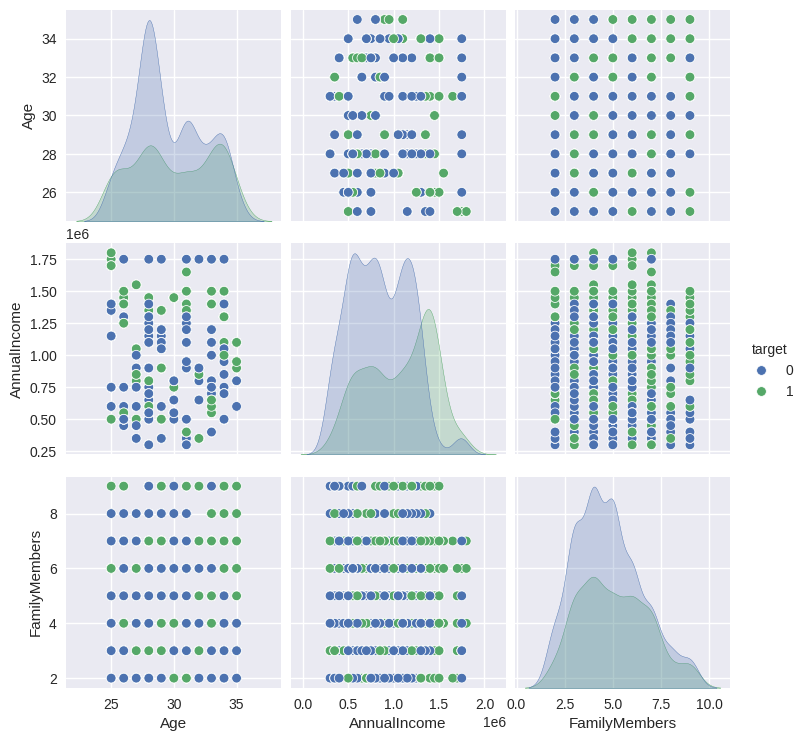

In [17]:
sns.pairplot(df, vars=['Age', 'AnnualIncome', 'FamilyMembers'], hue='target')
plt.show()

<br>

Check the quantity of target column:

In [18]:
df['target'].value_counts()

target
0    766
1    483
Name: count, dtype: int64

<br>

<h2 align='center'>
<span style='background:black; color:lawngreen'>
<b>
3 | Feature Engineering
</b>
</span>
</h2>

<br>

Let see our dataframe again:

In [19]:
df.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,target
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


In [20]:
dummy_df = pd.get_dummies(df, columns=categorical_df.drop(columns=['target']).columns, drop_first=True)

<br>

Confirming absense of outliers in our dataset by drawing boxplot for `numerical_df`:

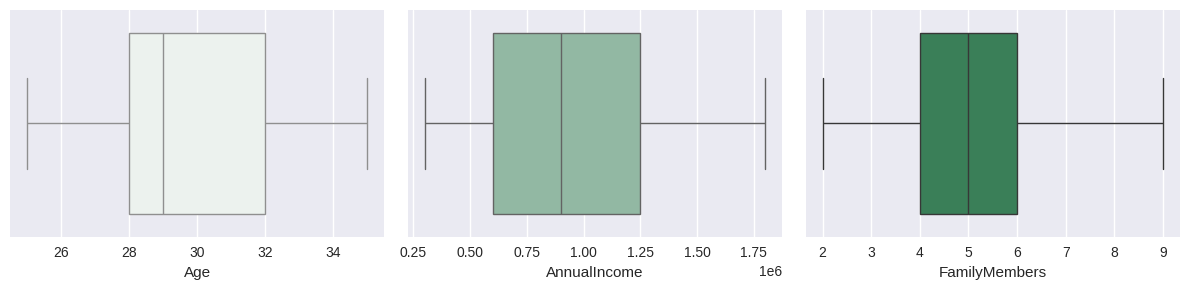

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

colors = sns.light_palette('seagreen', numerical_df.shape[1])
for i, col in enumerate(numerical_df.columns):
  sns.boxplot(data=numerical_df, x=col, ax=ax[i], color=colors[i])

plt.tight_layout()
plt.show()

<br>

Draw heatmap to see the correlation of our dataset.

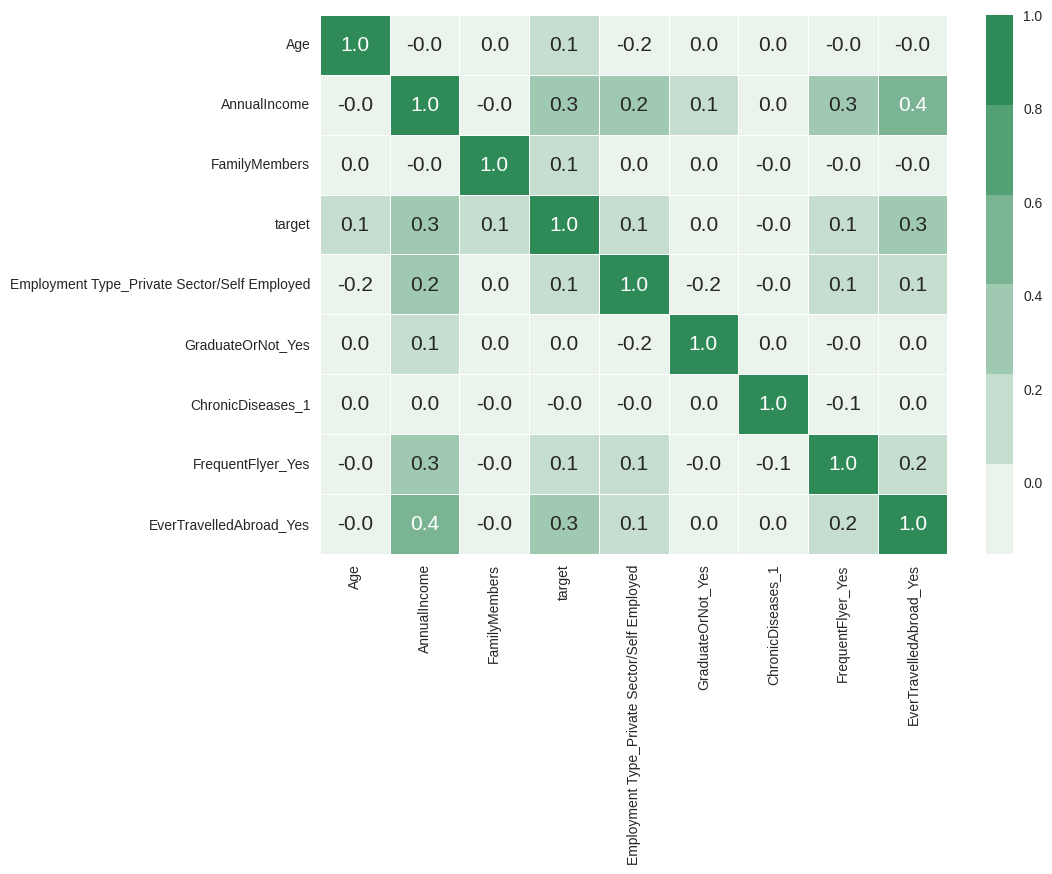

In [22]:
axes = sns.heatmap(dummy_df.corr(), 
                 cmap=sns.light_palette('seagreen'), 
                 annot=True, 
                 annot_kws={'size':15}, linewidth=.5, fmt=".1f")

axes.set(xlabel='', ylabel='')

plt.show()

Now we drop all of the columns has correlated value less than 0.1 (so low) and draw the heatmap again.

In [23]:
dummy_df.corr()['target']

Age                                             0.067536
AnnualIncome                                    0.293913
FamilyMembers                                   0.084907
target                                          1.000000
Employment Type_Private Sector/Self Employed    0.076309
GraduateOrNot_Yes                               0.031770
ChronicDiseases_1                              -0.010015
FrequentFlyer_Yes                               0.127426
EverTravelledAbroad_Yes                         0.301224
Name: target, dtype: float64

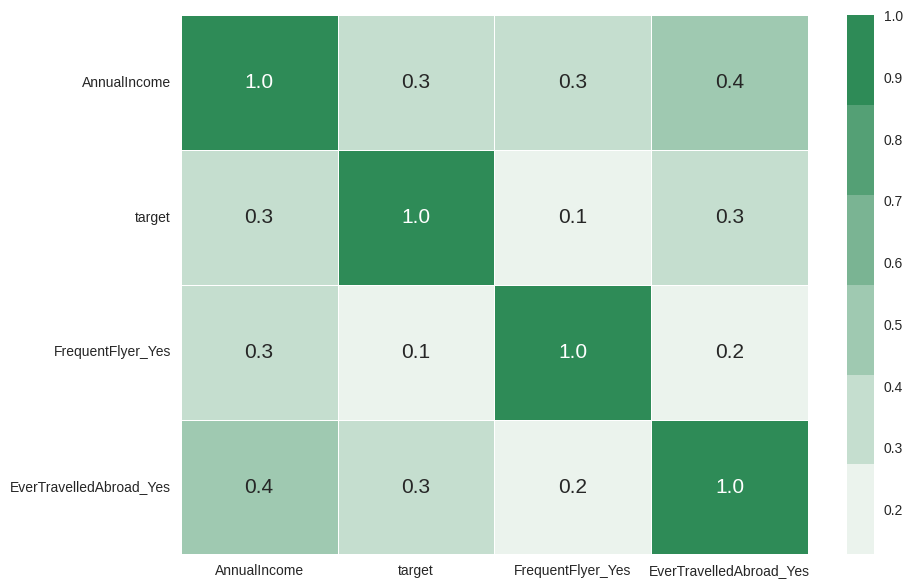

In [24]:
for value, col in zip(dummy_df.corr()['target'], dummy_df.columns):
    if abs(value) < 0.1:
      dummy_df.drop(columns=col, inplace=True)

axes = sns.heatmap(dummy_df.corr(), 
                 cmap=sns.light_palette('seagreen'), 
                 annot=True, 
                 annot_kws={'size':15}, linewidth=.5, fmt=".1f")

axes.set(xlabel='', ylabel='')

plt.show()

We can see that `AnnualIncome` and `EverTravelledAbroad` have high correlation with `target` column.

<br>

<h2 align='center'>
<span style='background:black; color:lawngreen'>
<b>
4 | Train-Test split
</b>
</h2>

In [25]:
X = dummy_df.drop(columns=['target']).values
y = np.array(dummy_df['target']).reshape(-1, 1)

print(f'X_shape: {X.shape}\nY_Shape: {y.shape}')

X_shape: (1249, 3)
Y_Shape: (1249, 1)


Now we split our data into Training set and Testing set.

In [26]:
# for split train-test:
from sklearn.model_selection import train_test_split

def split_train_test(X, y: float, train_size: float=0.7, random_state: int=24):
    
    train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                        train_size=train_size,
                                                        random_state=random_state,
                                                        shuffle=True)
    
    print(f'Shape of X_train: {train_X.shape}')
    print(f'Shape of y_train: {train_y.shape}')
    print(f'Shape of X_test: {test_X.shape}')
    print(f'Shape of y_test: {test_y.shape}')
    
    return train_X, test_X, train_y, test_y

In [27]:
X_train, X_test ,y_train, y_test = split_train_test(X, y, train_size=0.8, random_state=242)

Shape of X_train: (999, 3)
Shape of y_train: (999, 1)
Shape of X_test: (250, 3)
Shape of y_test: (250, 1)


<br>

<h2 align='center'>
<span style='background:black; color:lawngreen'>
<b>
5 | Build and Train model
</b>
</h2>

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# make pipeline:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

<br>

Build the function to choose best parameter to build our model:

In [157]:
def choose_params(model, param, X=X_train, y=y_train):

    model_ = GridSearchCV(
        model,
        param_grid=param,
        cv=10,
        scoring='f1_weighted'
    ).fit(X, y)

    return model_.best_params_

<br>

Build Gaussian Naive Bayes model for Numerical dataframe:

In [203]:
def find_GaussianNB_model_param(X=X_train, y=y_train):
    
    '''Gaussian Naive Bayes for numerical data'''

    params_GNB = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    best_param = choose_params(GaussianNB(), params_GNB)

    return best_param

In [204]:
print(find_GaussianNB_model_param())

{'var_smoothing': np.float64(0.1873817422860384)}


<br>

Build Bernoulli Naive Bayes model for Categorical dataframe:

In [166]:
def find_BernoulliNB_param(X=X_train, y=y_train):

    '''Bernoulli Naive Bayes for categorical data'''

    params_BNB = {'alpha': [1e-2, 1e-1, 0.5, 1, 10]}
    
    return choose_params(BernoulliNB(), params_BNB)

In [167]:
print(find_BernoulliNB_param())

{'alpha': 0.01}


<br>

To make the complete prediction for all data, now we combine two models above by using Stacking method.

In [208]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

def stack_model(X=X_train, y=y_train):
    gau_pipeline = make_pipeline(GaussianNB(var_smoothing=0.1873817422860384))
    ber_pipeline = make_pipeline(BernoulliNB(alpha=(0.01)))

    stack = StackingClassifier(
        estimators=[
            ('gaussian', gau_pipeline),
            ('bernoulli', ber_pipeline)
        ],
        final_estimator=LogisticRegression()
    )

    return stack.fit(X, y)

<br>

<h2 align='center'>
<span style='background:black; color:lawngreen'>
<b>
6 | Perform and Measure the Performance of model
</b>
</h2>

In [52]:
# for evalute model's preformance:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, \
  accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [206]:
def show_performance(y_true, y_pred):
    
    '''
    Show the performance of our model 
    Params:
        y_true: ground truth values
        y_pred: our prediction
    Return:
        Metrics to evalute model's performance
    '''
    
    # Todo: Return our error value like accuracy, f1score, ...
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'F1: {f1_score(y_true, y_pred)}')
    print(f'Classification report:\n{classification_report(y_true, y_pred)}')
   
    # Todo: Only choose one of them as our score
    main_score = f1_score(y_true, y_pred)
    
    return main_score

<br>

Show the performance of our model:

In [216]:
y_pred = stack_model().predict_proba(X_test)
y_pred = np.where(y_pred[:, 0] > 0.595, 0, 1)

f1 = show_performance(y_pred=y_pred, y_true=y_test)
print(f'The main metric is F1-score = {f1:.4f}')

Precision: 0.6025641025641025
Recall: 0.5222222222222223
Accuracy: 0.704
F1: 0.5595238095238095
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       160
           1       0.60      0.52      0.56        90

    accuracy                           0.70       250
   macro avg       0.68      0.66      0.67       250
weighted avg       0.70      0.70      0.70       250

The main metric is F1-score = 0.5595


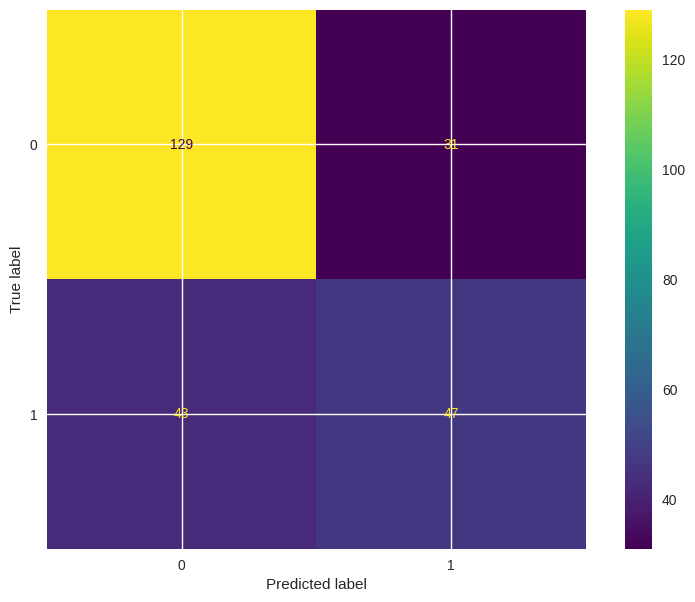

In [217]:
display_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))

display_.plot()

plt.show()